In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#The Sklearn library is used to import various metrics that can be used to evaluate a machine learning model
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Import the CSV file with Pandas.
data = pd.read_csv('C:/Users/wm408/LSE Course 2/Module 6/Data/raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


### 1. Get to know the data

- Find the distribution of house prices over time and check for missing values. 
    - Plot the house prices as a time series, specify the legend and title of the plot, and use data.isna() to check for missing values. 
    - Are you able to make any valuable observations at this stage?

In [2]:
data.columns

Index(['postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [4]:
# Determine whether there are missing values.
data.isna().sum()

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

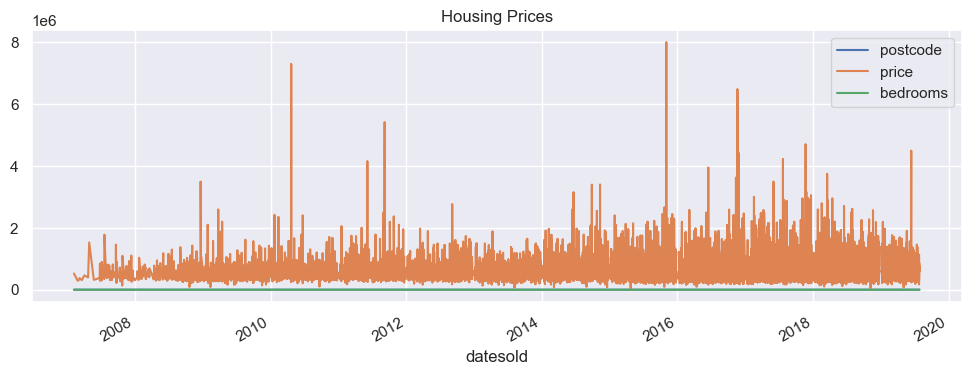

In [5]:
# Plot house prices as time series.
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Housing Prices")
plt.show(block=False);

In [6]:
data[data.index.duplicated()]

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-06-27,2612,850000,house,4
2007-07-18,2602,590000,house,3
2007-07-20,2904,549000,house,4
2007-07-30,2607,558000,house,4
2007-07-31,2903,520000,house,4
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


In [7]:
data[data.index.duplicated(keep=False)]

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-06-27,2906,305000,house,3
2007-06-27,2612,850000,house,4
2007-07-18,2602,530000,house,3
2007-07-18,2602,590000,house,3
2007-07-20,2605,525000,house,3
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


In [8]:
data_test= data.loc[~data.index.duplicated(), :]

This code creates a new dataframe called data_test from the original dataframe data by selecting only the rows with unique index values and all columns. The tilde ~ symbol before data.index.duplicated() is a negation operator, so it returns the opposite of data.index.duplicated(), which returns a Boolean mask indicating whether each index value is duplicated or not. The .loc[] accessor is used to filter the rows of the dataframe based on this Boolean mask.

<AxesSubplot:xlabel='datesold', ylabel='price'>

Text(0.5, 1.0, 'Housing Prices')

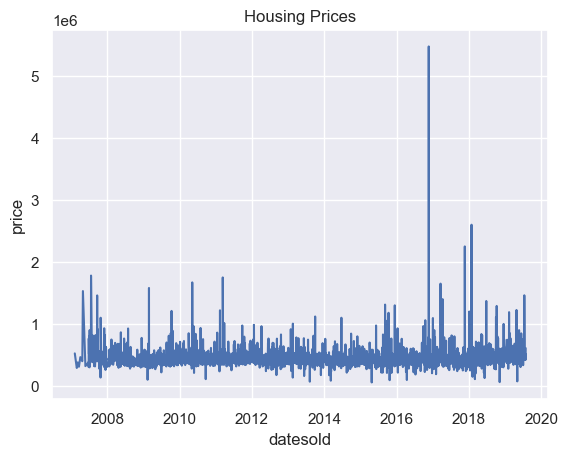

In [21]:
sns.lineplot(data=data_test, x='datesold', y='price')
plt.title("Housing Prices")
plt.show(block=False)

- Check for the count of houses based on the number of bedrooms and plot the houses by bedroom count. 
- What is the most common house size? What other exploratory visualisations might you create with this data?

In [10]:
# Filter the data to only include houses
houses = data[data['propertyType'] == 'house']

# Group the data by number of bedrooms and count the number of houses in each group
bedrooms = houses.groupby('bedrooms')['propertyType'].count()

bedrooms

bedrooms
0       19
1       95
2      806
3    11281
4    10404
5     1947
Name: propertyType, dtype: int64

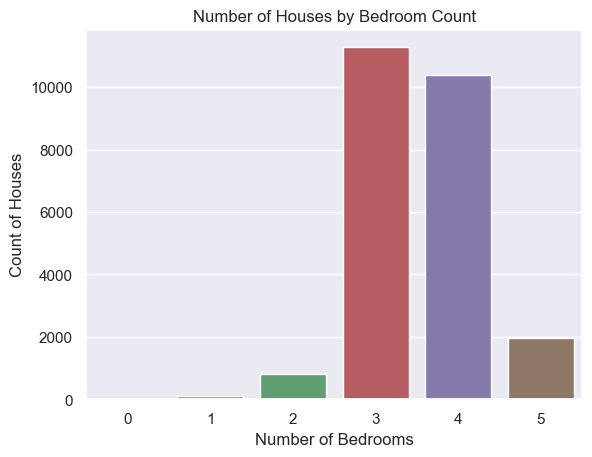

In [11]:
# Plot the results using a bar plot
sns.countplot(x='bedrooms', data=houses)
plt.title('Number of Houses by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Houses')
plt.show();

In [12]:
# Count the number of houses and units
houses = data[data['propertyType'] == 'house'].shape[0]
units = data[data['propertyType'] == 'unit'].shape[0]

print("Number of houses:", houses)
print("Number of units:", units)

Number of houses: 24552
Number of units: 5028


### 2. Define subsets

- Now we want to create sub-data sets using the number of bedrooms. Create a copy of the original data. 
- Divide it into five data subsets consisting of houses with one, two, three, four, and five bedrooms respectively. 
- Hint: you will need to subset the bedroom counts and create five new DataFrames.

In [13]:
# Create a copy of the original data for convenience. 
data_sub = data.copy()

# Data set consisting of houses with 1 bedroom: 
bedroom_1 = data_sub[data_sub['bedrooms'] == 1]
print(bedroom_1.shape)

bedroom_2 = data_sub[data_sub['bedrooms'] == 2]
print(bedroom_2.shape)

bedroom_3 = data_sub[data_sub['bedrooms'] == 3]
print(bedroom_3.shape)

bedroom_4 = data_sub[data_sub['bedrooms'] == 4]
print(bedroom_4.shape)

bedroom_5 = data_sub[data_sub['bedrooms'] == 5]
print(bedroom_5.shape)


(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


### 3. Detect outliers
- Now create a histogram for each subset by the number of bedrooms. 
- Plot each subset as subplots in a multi-plot, three-by-two, layout. Take note that the indexing refers to the position where the plot is rendered in a multi-plot layout.
- Create a boxplot for the one-bedroom house subset by the number of bedrooms to find the outliers. 
- You can compare each subset by creating boxplots for each subset. 
- This will allow you to begin comparing houses of different sizes. 

(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

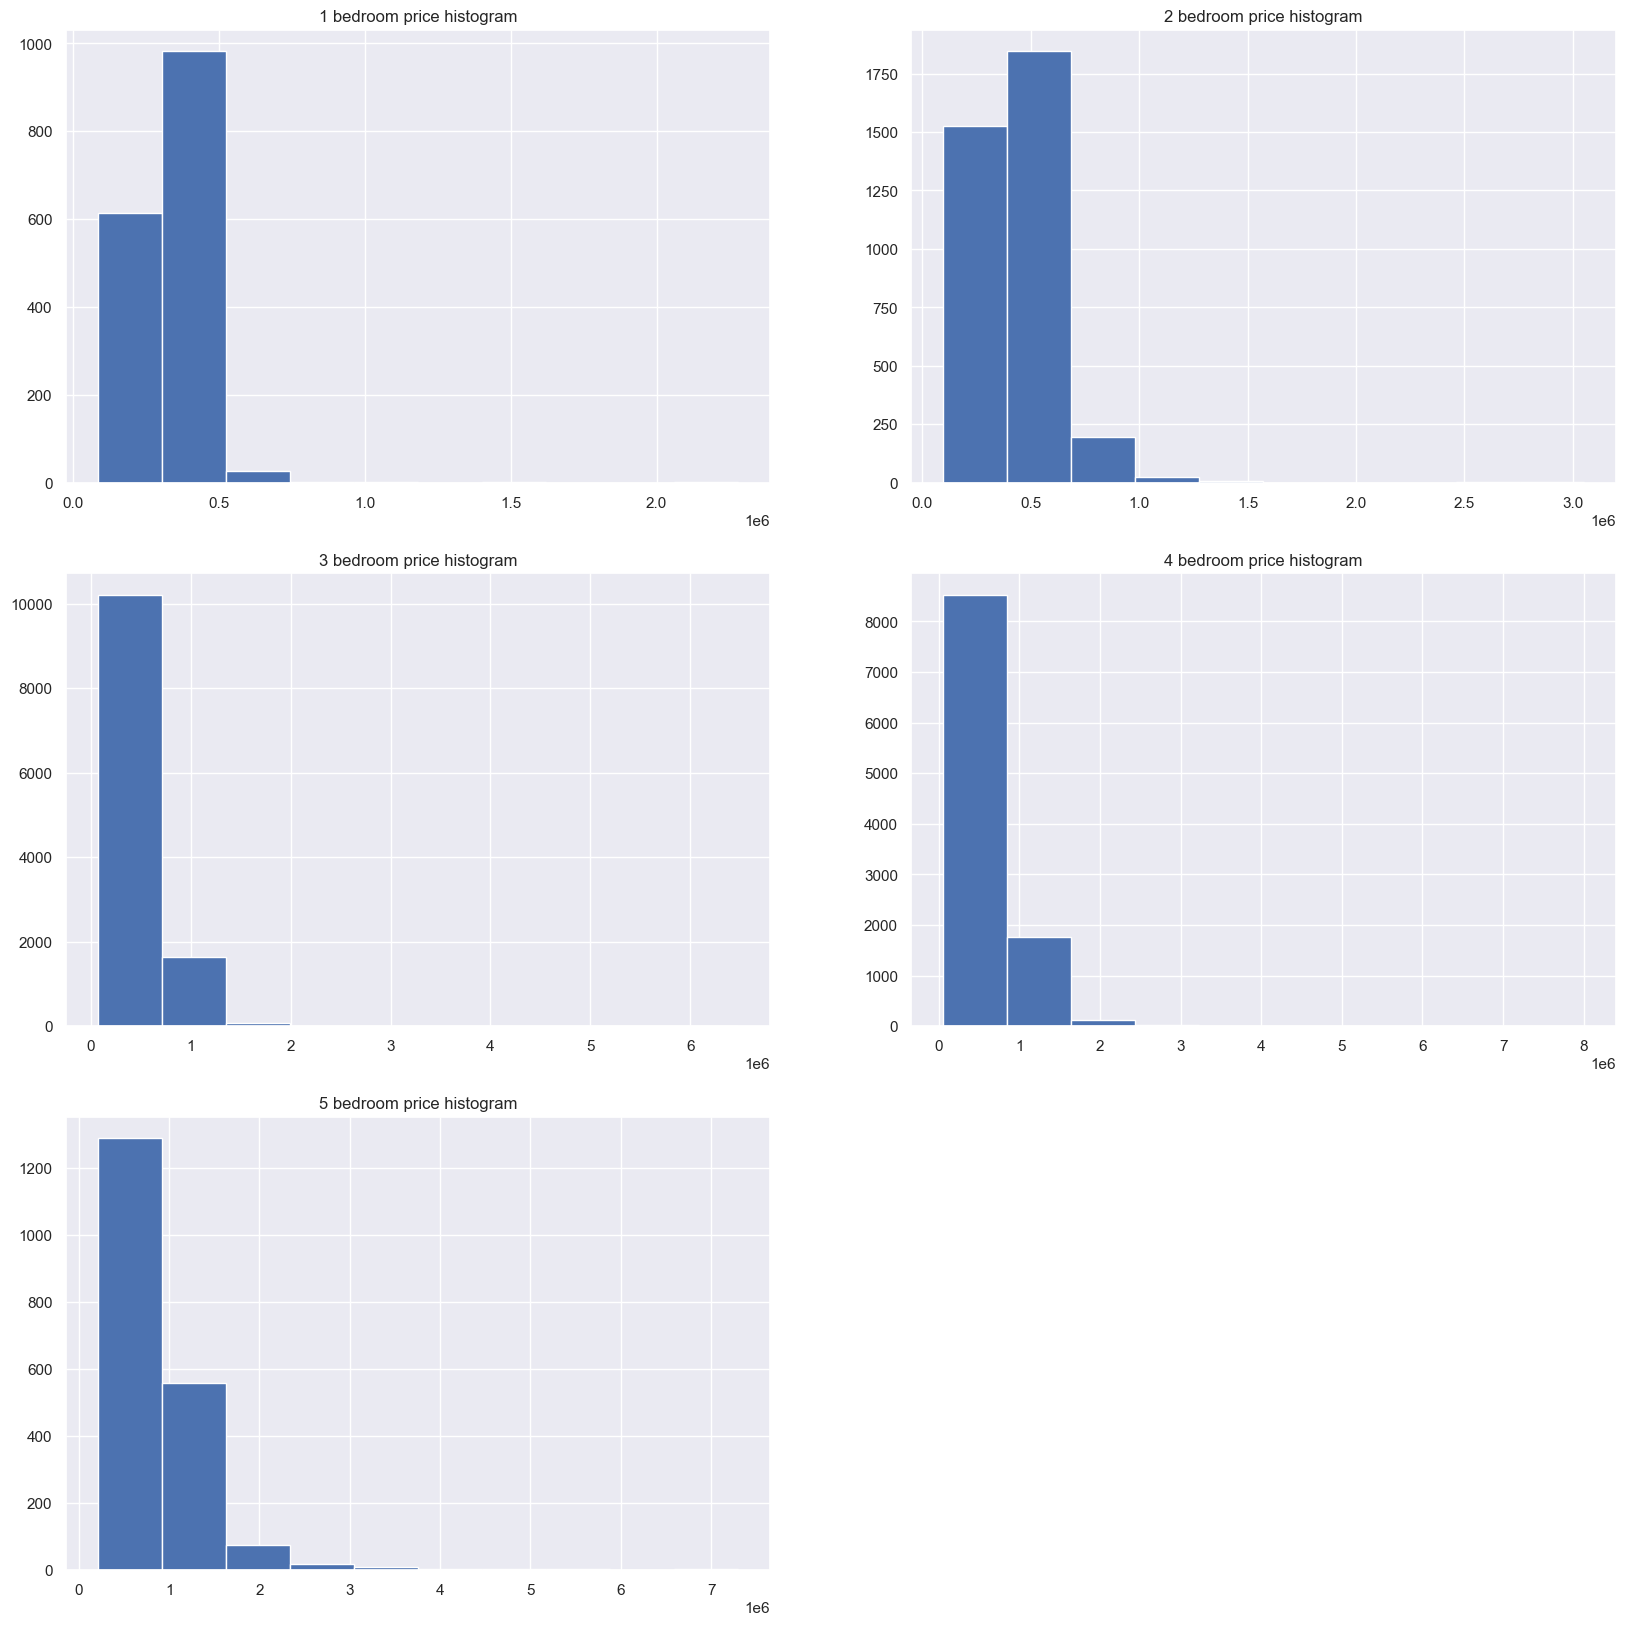

In [14]:
# Set plot size.
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20, 20))

# 1 bedroom:
axes[0][0].hist(bedroom_1['price'])
axes[0][0].title.set_text("1 bedroom price histogram")

# 2 bedrooms:
axes[0][1].hist(bedroom_2['price'])
axes[0][1].title.set_text("2 bedroom price histogram")

# 3 bedrooms:
axes[1][0].hist(bedroom_3['price'])
axes[1][0].title.set_text("3 bedroom price histogram")

# 4 bedrooms:
axes[1][1].hist(bedroom_4['price'])
axes[1][1].title.set_text("4 bedroom price histogram")

# 5 bedrooms:
axes[2][0].hist(bedroom_5['price'])
axes[2][0].title.set_text("5 bedroom price histogram")


fig.delaxes(axes[2][1])

plt.show()

# The subplot is indexed by its position in the 3 by 2 subplot grid, where the first index refers to the row and the second index refers to the column.

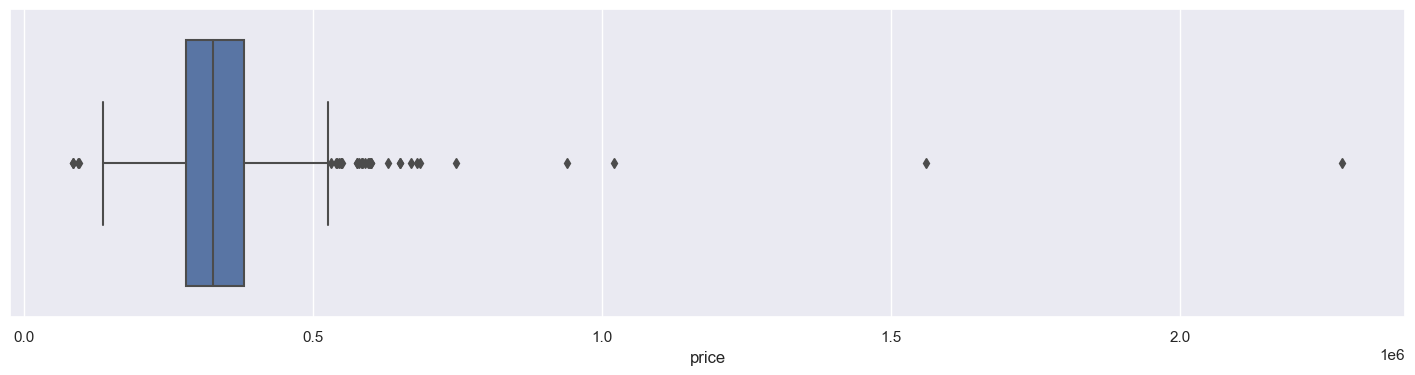

In [15]:
# Create a box plot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create box plot.
ax = sns.boxplot(x=bedroom_1['price'], whis=1.5)

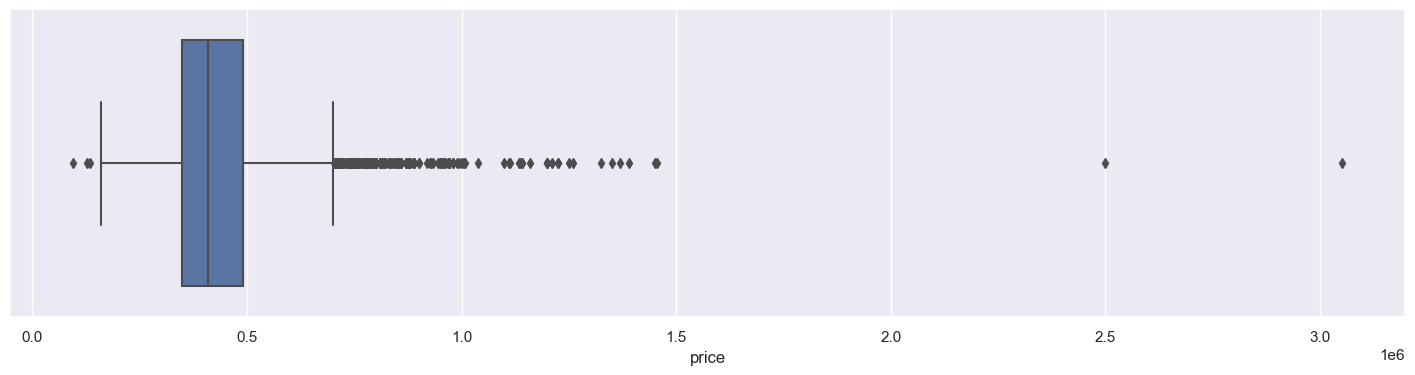

In [16]:
# Create a box plot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create box plot.
ax = sns.boxplot(x=bedroom_2['price'], whis=1.5)

### 4. Remove outliers

- Clean any outliers by removing them from each subset. 
    - Find the first and third quartiles and the interquartile range (IQR). 
    - Then return a boolean arrow of the rows with (any) non-outlier column values, and filter the DataFrame based on this condition. 
    - Start by removing the outliers from the one-bedroom houses data set, then continue to remove outliers for houses with two, three, four, and five bedrooms. 

- Generate a boxplot for each sub-data set by the number of bedrooms with outliers removed. Note: use whis as the multiplicative factor of 1.5.

In [17]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = bedroom_1[cols].quantile(0.25) 
Q3 = bedroom_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((bedroom_1[cols] < (Q1 - 1.5 * IQR)) | (bedroom_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
bedroom_1_non_outlier = bedroom_1[condition]
bedroom_1_non_outlier.shape
bedroom_1.shape

price    100250.0
dtype: float64

(1592, 4)

(1627, 4)

In [18]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = bedroom_2[cols].quantile(0.25) 
Q3 = bedroom_2[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((bedroom_2[cols] < (Q1 - 1.5 * IQR)) | (bedroom_2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
bedroom_2_non_outlier = bedroom_2[condition]
bedroom_2_non_outlier.shape
bedroom_2.shape

price    140000.0
dtype: float64

(3387, 4)

(3598, 4)

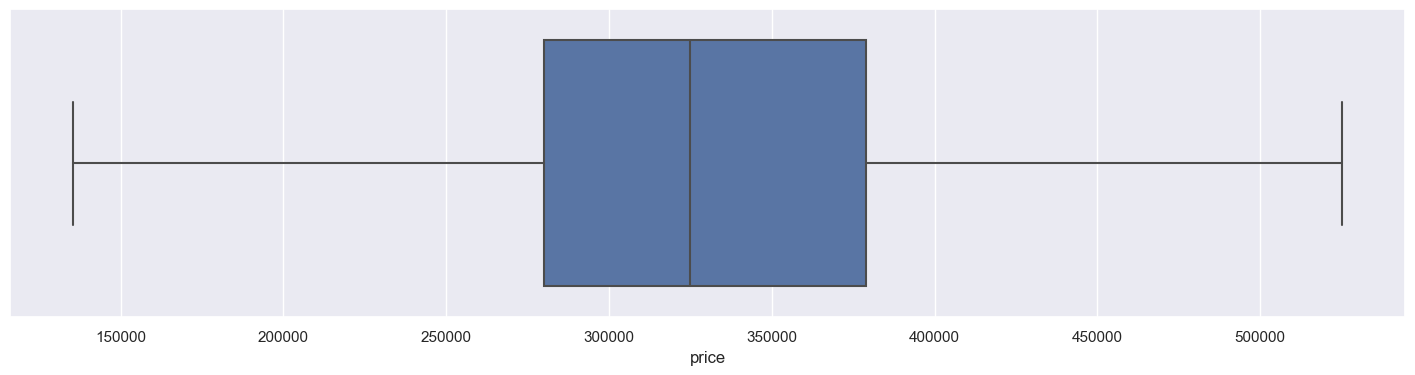

In [19]:
# Create a box plot for 1 bedroom - withput outliers
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create box plot.
ax = sns.boxplot(x=bedroom_1_non_outlier['price'], whis=1.5)

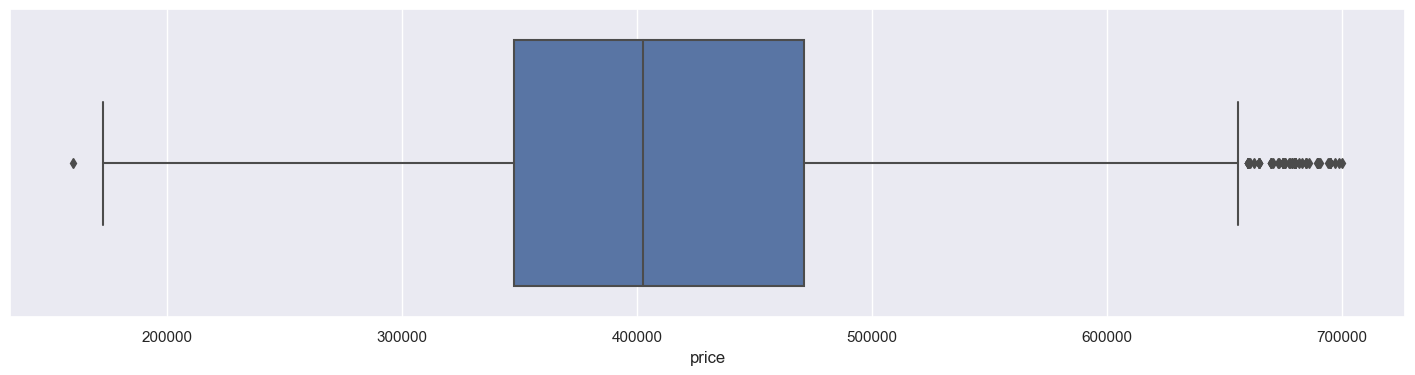

In [20]:
# Create a box plot for 2 bedroom - withput outliers
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create box plot.
ax = sns.boxplot(x=bedroom_2_non_outlier['price'], whis=1.5)